In [1]:
import multimodal_cci as mmcci

2024-04-23 16:06:17.758464: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 16:06:18.955078: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 16:06:19.475706: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-23 16:06:19.475763: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc

In [2]:
import pickle

with open('../../data/benchmarking_data.pkl', 'rb') as f:
    benchmarking_data = pickle.load(f)

In [3]:
from matplotlib import pyplot as plt

pallete = 'Paired'
colors = {
    'Bcell': plt.colormaps.get_cmap(pallete).colors[0],
    'Tcell': plt.colormaps.get_cmap(pallete).colors[1],
    'luminal_ar': plt.colormaps.get_cmap(pallete).colors[2],
    'mesenchymal': plt.colormaps.get_cmap(pallete).colors[3],
    'stroma': plt.colormaps.get_cmap(pallete).colors[5],
    'endothelial': plt.colormaps.get_cmap(pallete).colors[6],
    'macrophage': plt.colormaps.get_cmap(pallete).colors[9],
}

In [4]:
stlearn_filtered = [mmcci.it.remove_insignificant(sample, pvals) for sample, pvals in zip(benchmarking_data['stlearn_cci'], benchmarking_data['stlearn_pvals'])]
stlearn_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in stlearn_filtered]
squidpy_filtered = [mmcci.it.remove_insignificant(sample, pvals) for sample, pvals in zip(benchmarking_data['squidpy_cci'], benchmarking_data['squidpy_pvals'])]
squidpy_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in squidpy_filtered]
cellchat_filtered = [mmcci.it.remove_insignificant(sample, pvals) for sample, pvals in zip(benchmarking_data['cellchat_cci'], benchmarking_data['cellchat_pvals'])]
cellchat_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in cellchat_filtered]
natmi_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in benchmarking_data['natmi_cci']]

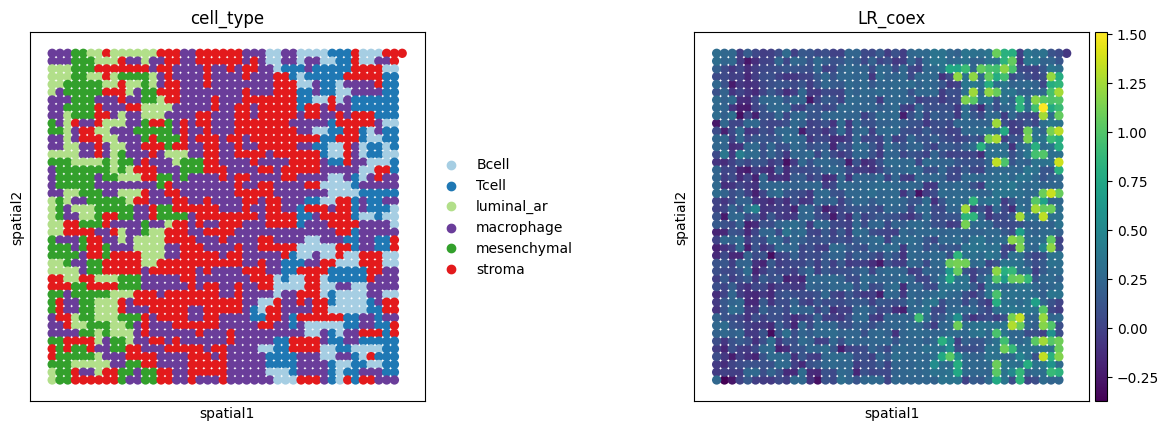

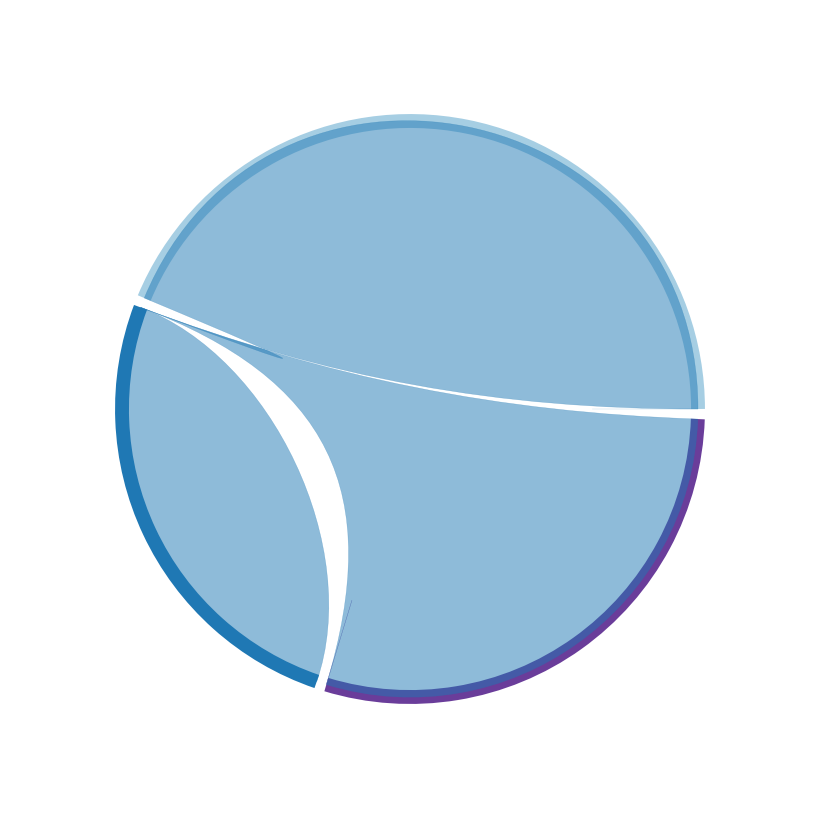

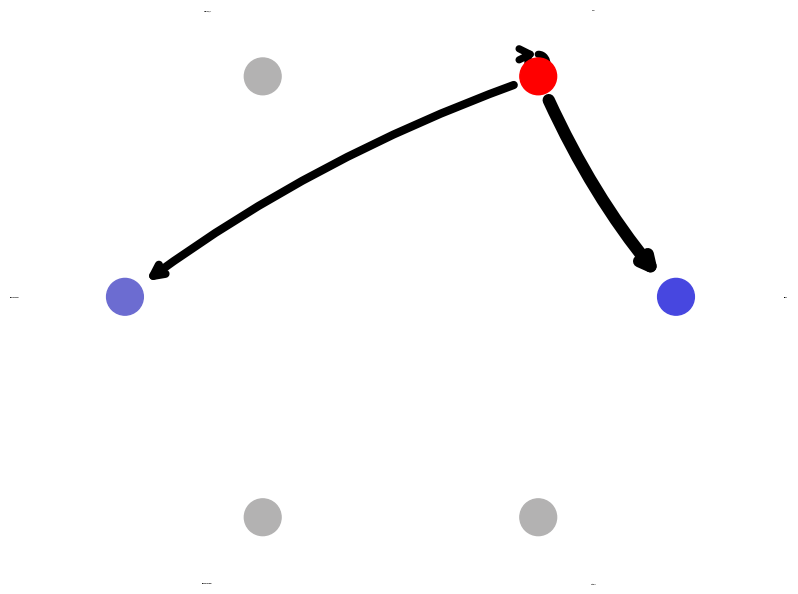

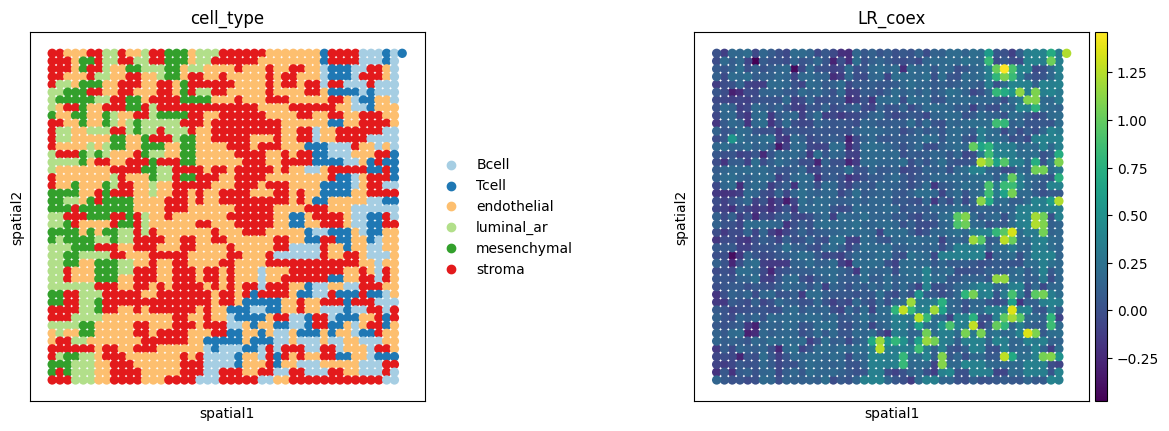

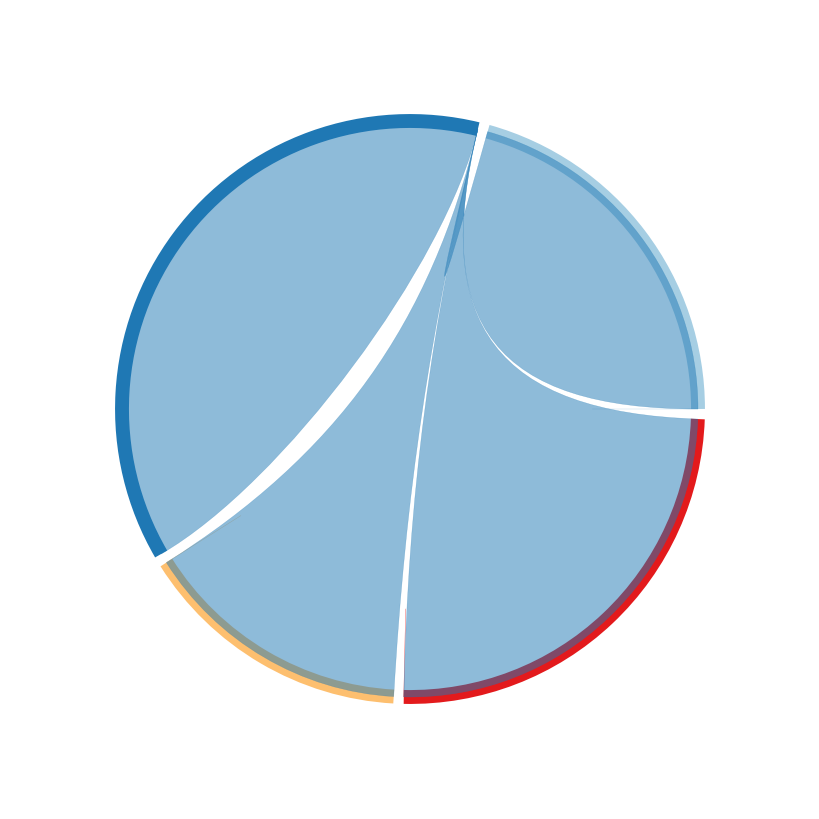

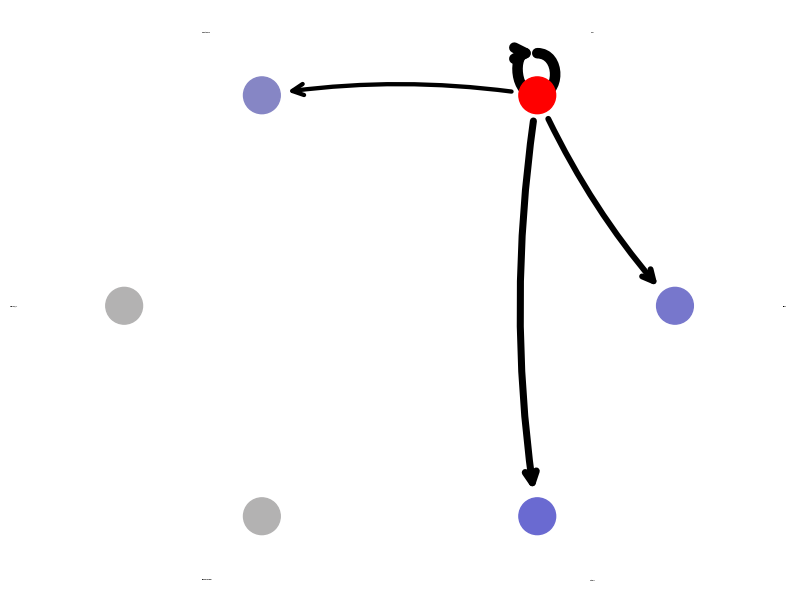

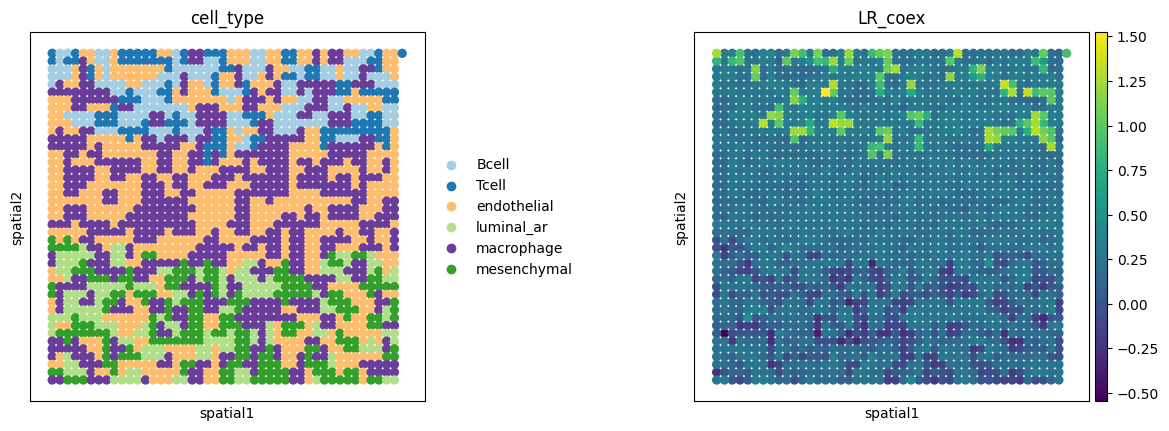

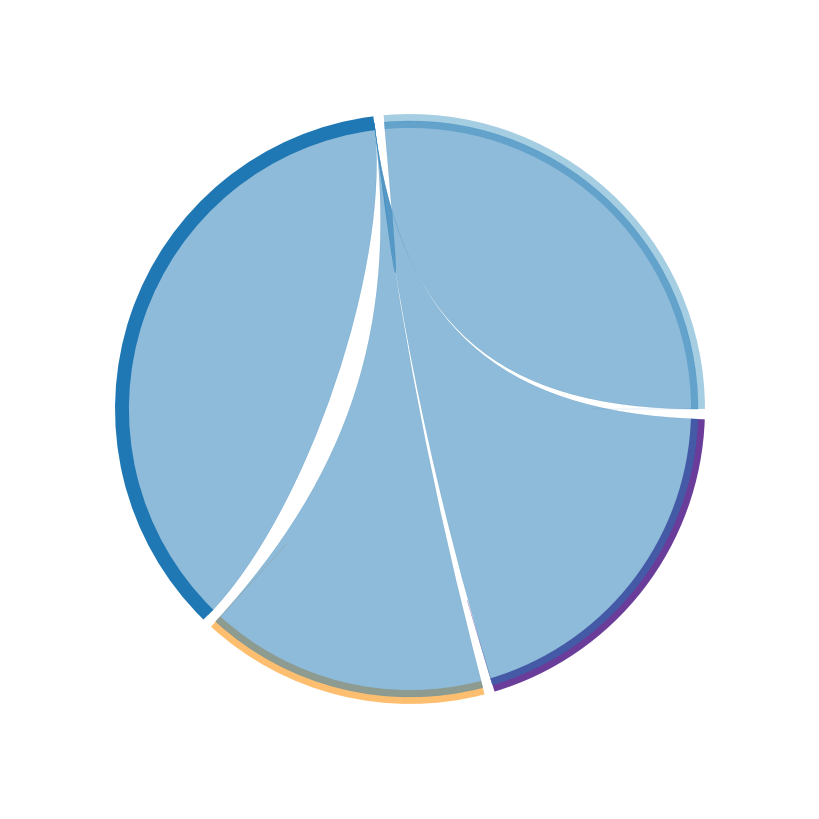

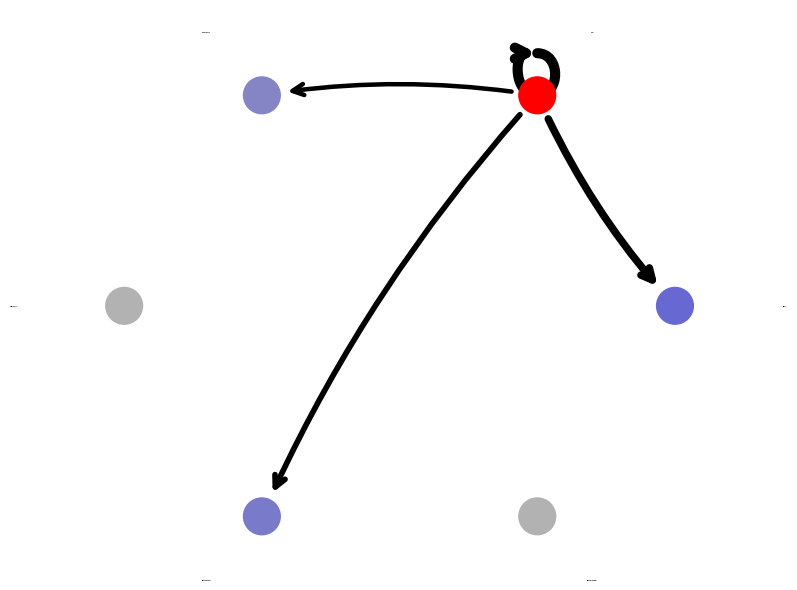

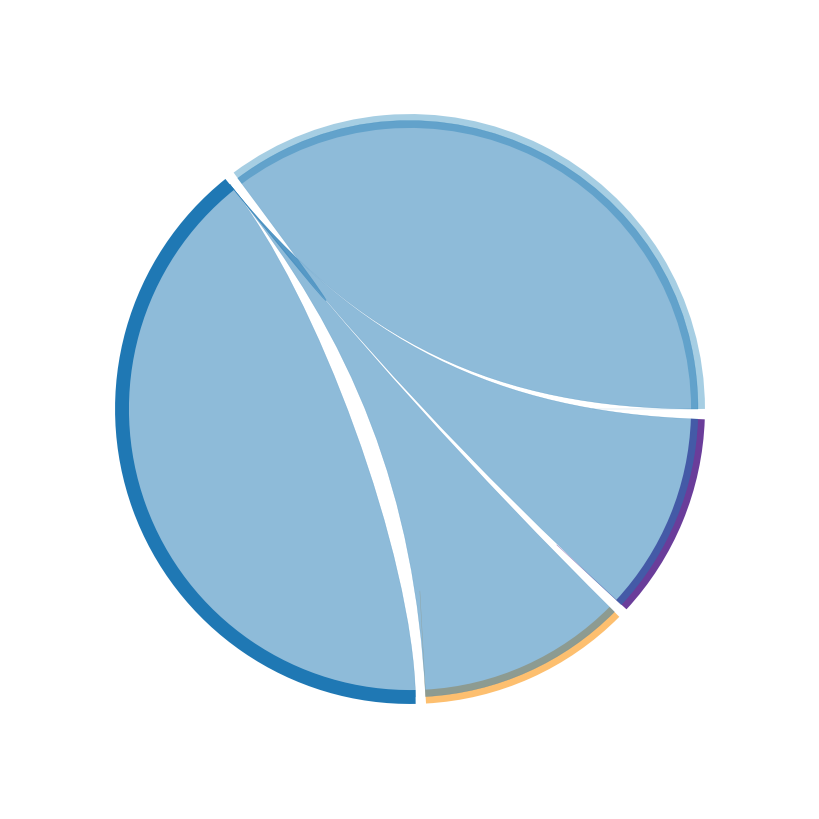

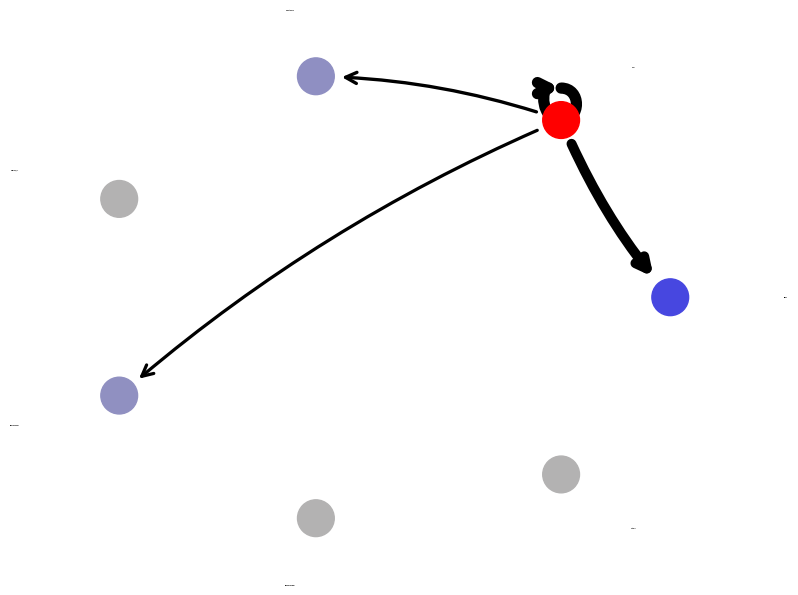

In [11]:
ligand = 'HLA-B'
receptor = 'KIR2DL3'

sc.tl.score_genes(spatial_data[0], [ligand, receptor], score_name='LR_coex')
sc.pl.spatial(spatial_data[0], color=['cell_type', 'LR_coex'], palette=colors, spot_size=1.2)
mmcci.plt.chord_plot(benchmarking_data["stlearn_cci"][0][f"{ligand}_{receptor}"], colors=colors, label_size=0)
mmcci.plt.network_plot(benchmarking_data["stlearn_cci"][0][f"{ligand}_{receptor}"], figsize=(8,6), text_size=0)
sc.tl.score_genes(spatial_data[1], [ligand, receptor], score_name='LR_coex')
sc.pl.spatial(spatial_data[1], color=['cell_type', 'LR_coex'], palette=colors, spot_size=1.2)
mmcci.plt.chord_plot(benchmarking_data["stlearn_cci"][1][f"{ligand}_{receptor}"], colors=colors, label_size=0)
mmcci.plt.network_plot(benchmarking_data["stlearn_cci"][1][f"{ligand}_{receptor}"], figsize=(8,6), text_size=0)
sc.tl.score_genes(spatial_data[2], [ligand, receptor], score_name='LR_coex')
sc.pl.spatial(spatial_data[2], color=['cell_type', 'LR_coex'], palette=colors, spot_size=1.2)
mmcci.plt.chord_plot(benchmarking_data["stlearn_cci"][2][f"{ligand}_{receptor}"], colors=colors, label_size=0)
mmcci.plt.network_plot(benchmarking_data["stlearn_cci"][2][f"{ligand}_{receptor}"], figsize=(8,6), text_size=0)

stlearn_int = mmcci.it.integrate_samples(benchmarking_data['stlearn_cci'], method=">=50%")
# p_vals = mmcci.it.integrate_p_vals(benchmarking_data['stlearn_pvals'])
# stlearn_int = mmcci.it.remove_insignificant(stlearn_int, p_vals)
mmcci.plt.chord_plot(stlearn_int[f"{ligand}_{receptor}"], colors=colors, label_size=0)
mmcci.plt.network_plot(stlearn_int[f"{ligand}_{receptor}"], figsize=(8,6), text_size=0)

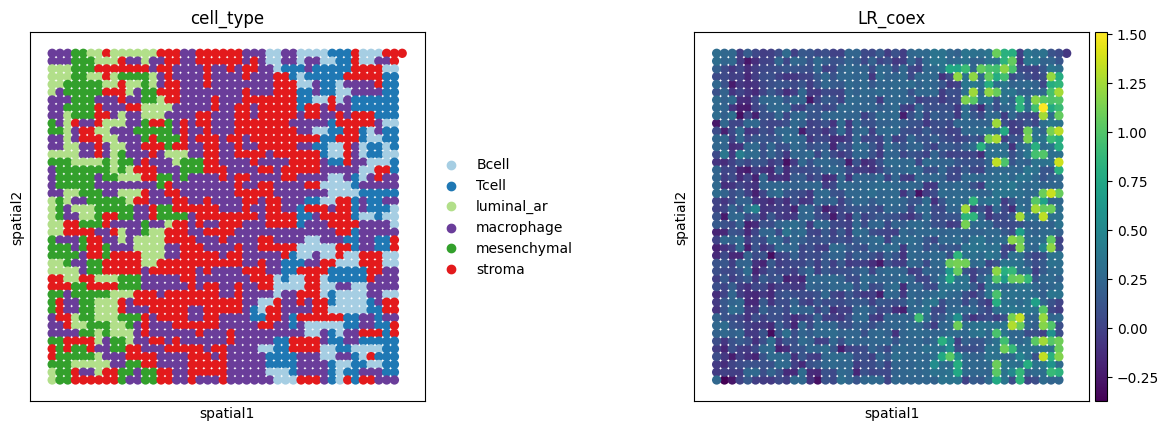

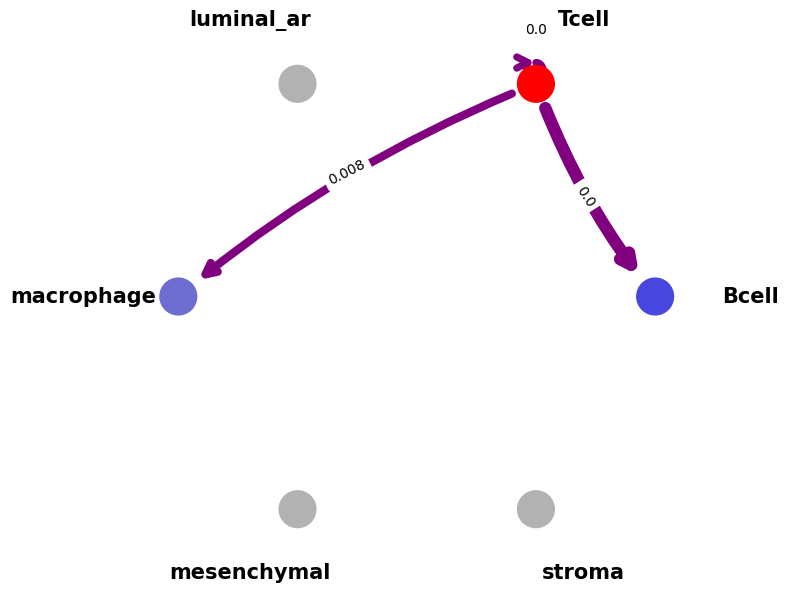

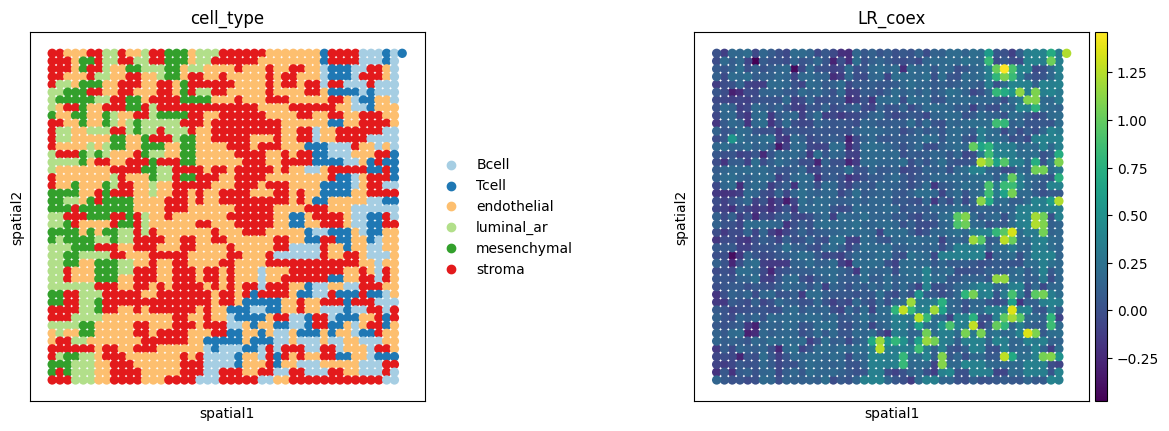

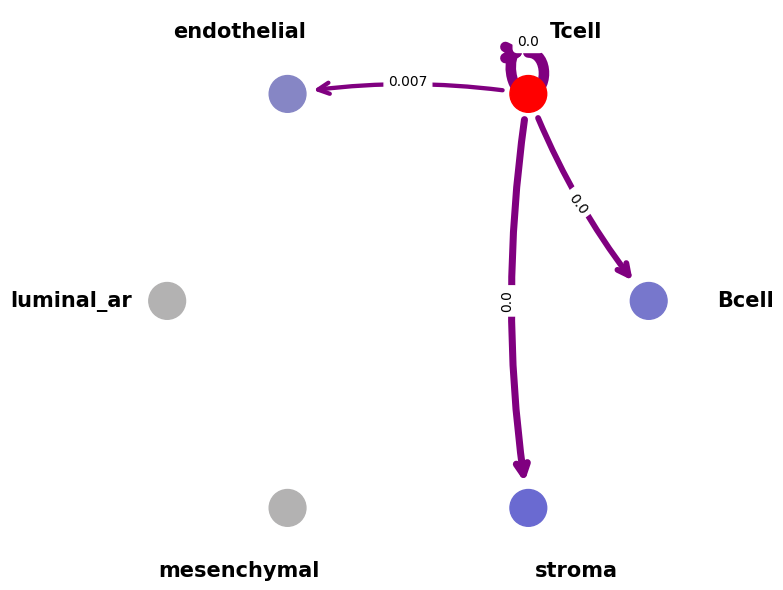

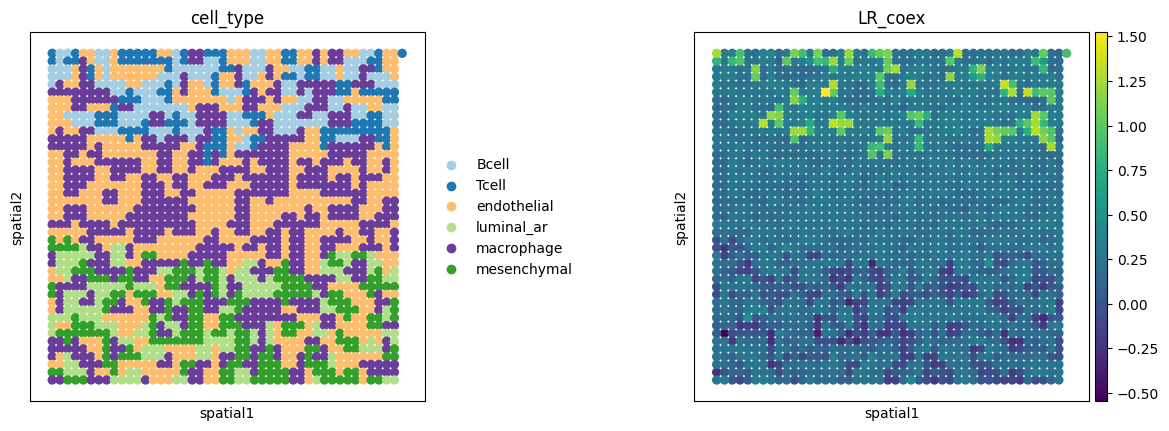

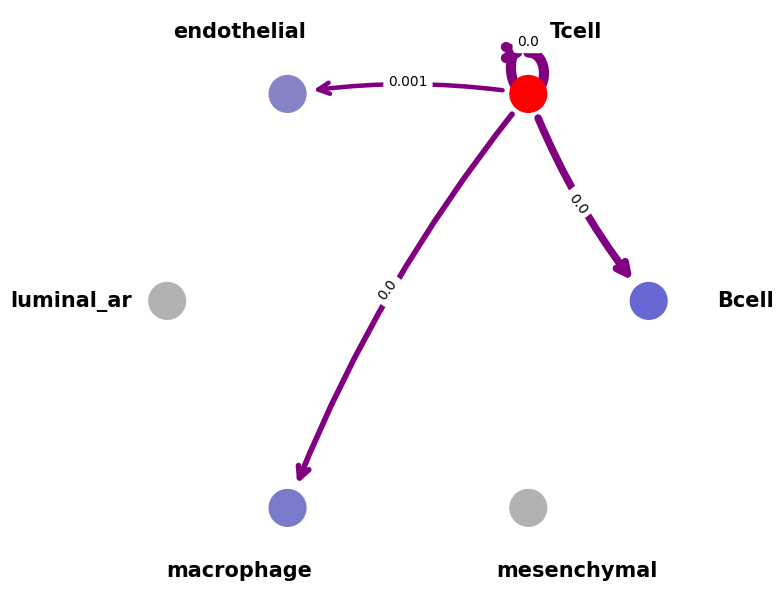

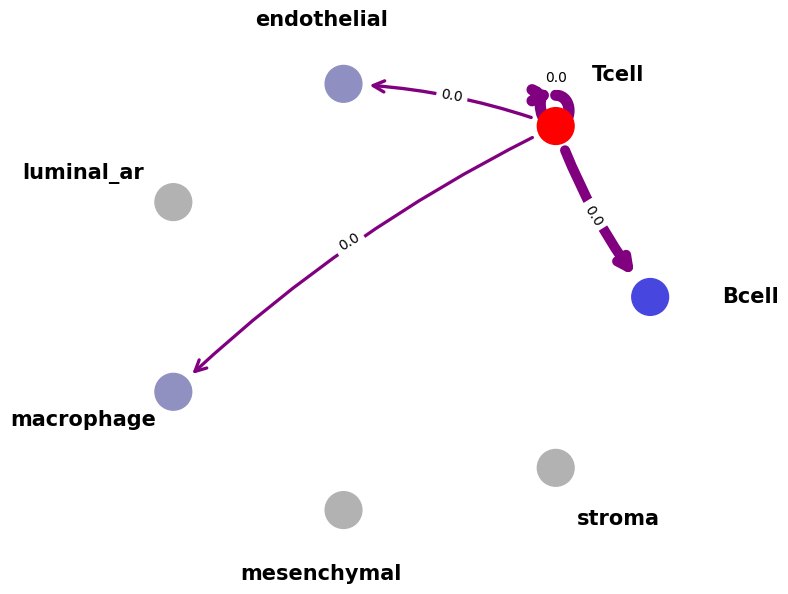

In [8]:
ligand = 'HLA-B'
receptor = 'KIR2DL3'

sc.tl.score_genes(spatial_data[0], [ligand, receptor], score_name='LR_coex')
sc.pl.spatial(spatial_data[0], color=['cell_type', 'LR_coex'], palette=colors, spot_size=1.2)
mmcci.plt.network_plot(stlearn_filtered[0][f"{ligand}_{receptor}"], figsize=(8,6), p_vals=benchmarking_data['stlearn_pvals'][0][f"{ligand}_{receptor}"])
sc.tl.score_genes(spatial_data[1], [ligand, receptor], score_name='LR_coex')
sc.pl.spatial(spatial_data[1], color=['cell_type', 'LR_coex'], palette=colors, spot_size=1.2)
mmcci.plt.network_plot(stlearn_filtered[1][f"{ligand}_{receptor}"], figsize=(8,6), p_vals=benchmarking_data['stlearn_pvals'][1][f"{ligand}_{receptor}"])
sc.tl.score_genes(spatial_data[2], [ligand, receptor], score_name='LR_coex')
sc.pl.spatial(spatial_data[2], color=['cell_type', 'LR_coex'], palette=colors, spot_size=1.2)
mmcci.plt.network_plot(stlearn_filtered[2][f"{ligand}_{receptor}"], figsize=(8,6), p_vals=benchmarking_data['stlearn_pvals'][2][f"{ligand}_{receptor}"])

stlearn_int = mmcci.it.integrate_samples(benchmarking_data['stlearn_cci'], method=">=50%")
p_vals = mmcci.it.integrate_p_vals(benchmarking_data['stlearn_pvals'], method="stouffer")
stlearn_int = mmcci.it.remove_insignificant(stlearn_int, p_vals)
mmcci.plt.network_plot(stlearn_int[f"{ligand}_{receptor}"], figsize=(8,6), p_vals=p_vals[f"{ligand}_{receptor}"])

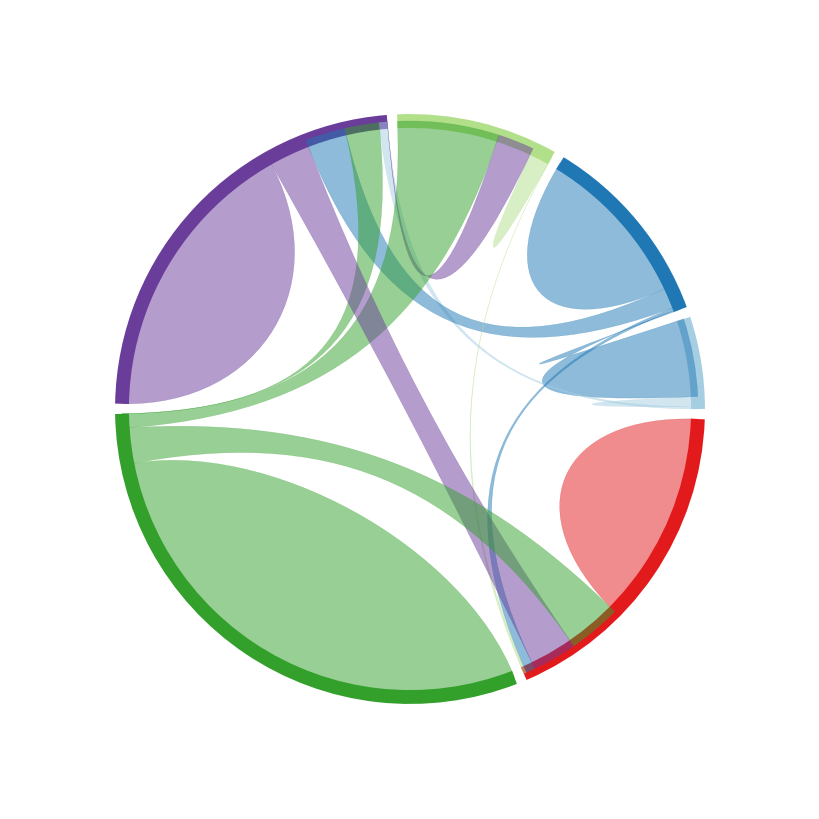

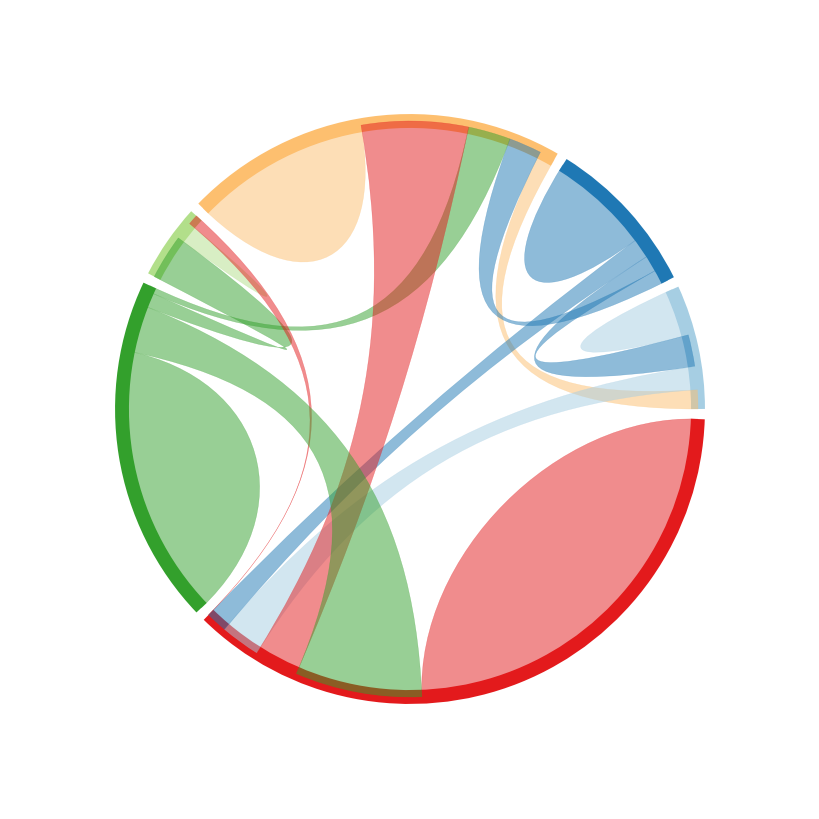

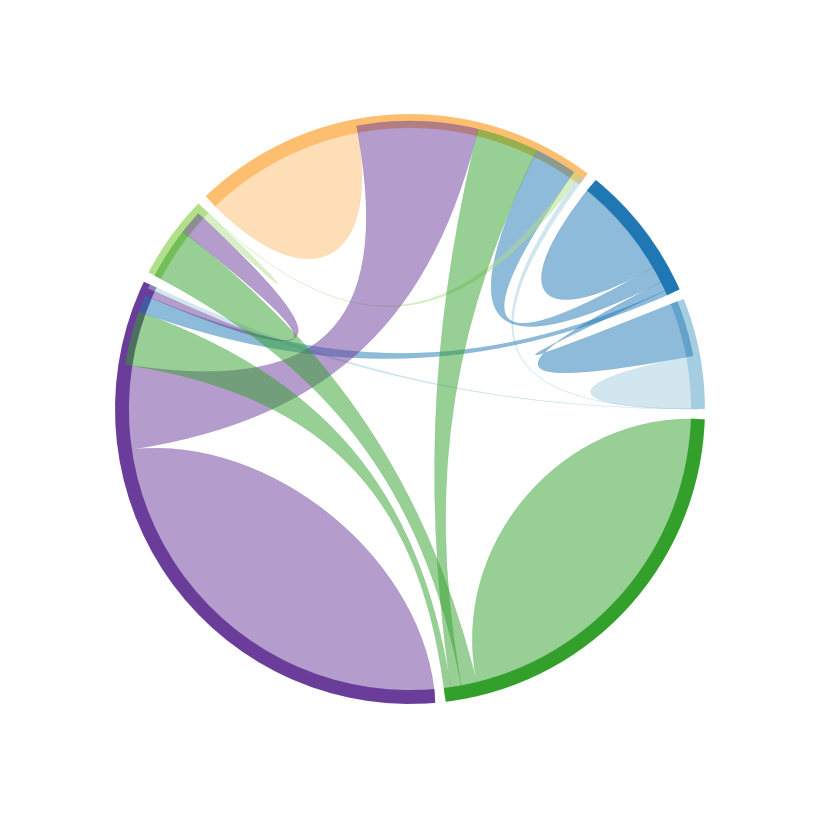

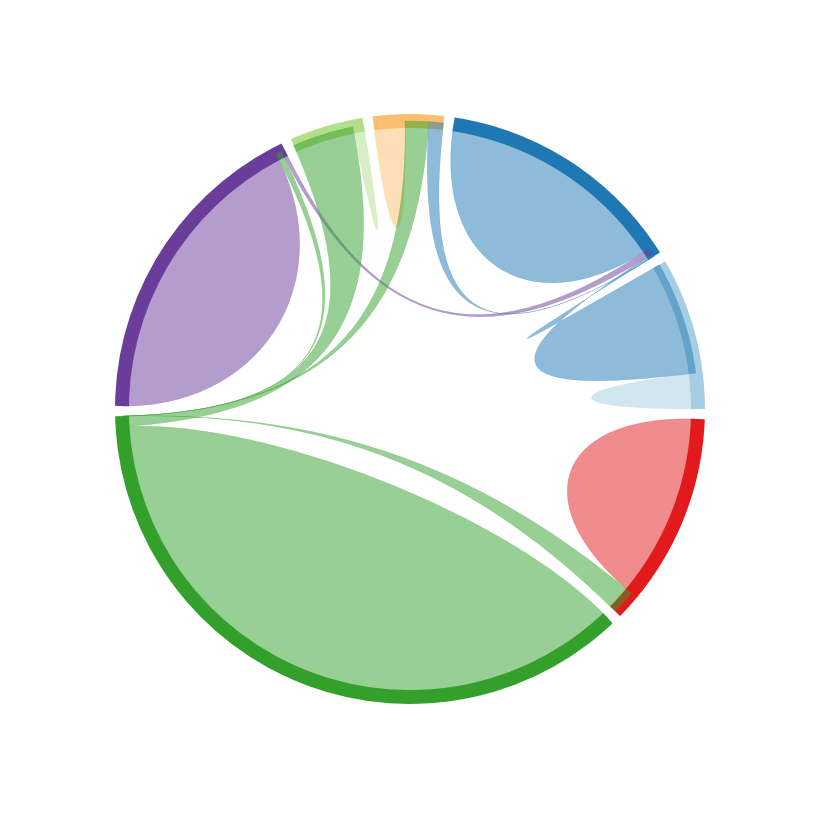

In [5]:
for sample in stlearn_overalls:
    mmcci.plt.chord_plot(sample, colors=colors, label_size=0)

stlearn_int = mmcci.it.integrate_samples(benchmarking_data['stlearn_cci'], method=">=50%")
p_vals = mmcci.it.integrate_p_vals(benchmarking_data['stlearn_pvals'])
stlearn_int = mmcci.it.remove_insignificant(stlearn_int, p_vals)
stlearn_overall = mmcci.it.calculate_overall_interactions(stlearn_int)

mmcci.plt.chord_plot(stlearn_overall, colors=colors, label_size=0)

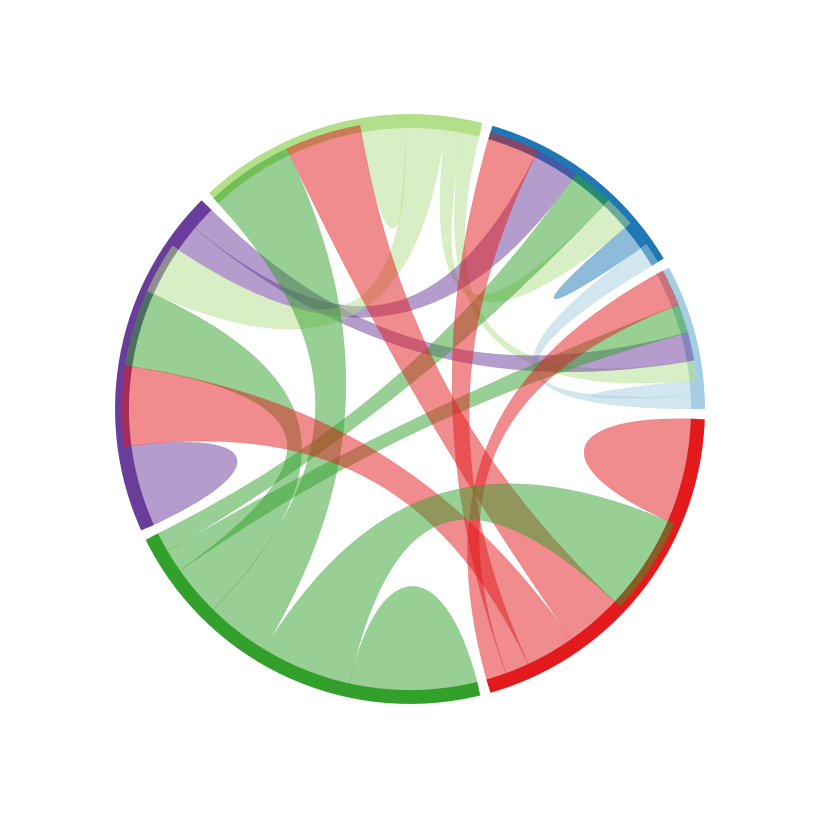

In [9]:
int = mmcci.it.integrate_samples([
    benchmarking_data['stlearn_cci'][0],
    benchmarking_data['cellchat_cci'][0],
    benchmarking_data['squidpy_cci'][0],
    benchmarking_data['natmi_cci'][0]
    ], method=">=50%")
# p_vals = mmcci.it.integrate_p_vals([
#     benchmarking_data['stlearn_pvals'][0],
#     benchmarking_data['cellchat_pvals'][0],
#     benchmarking_data['squidpy_pvals'][0]
#     ])
# int = mmcci.it.remove_insignificant(int, p_vals)
overall = mmcci.it.calculate_overall_interactions(int)

mmcci.plt.chord_plot(overall, colors=colors, label_size=0)

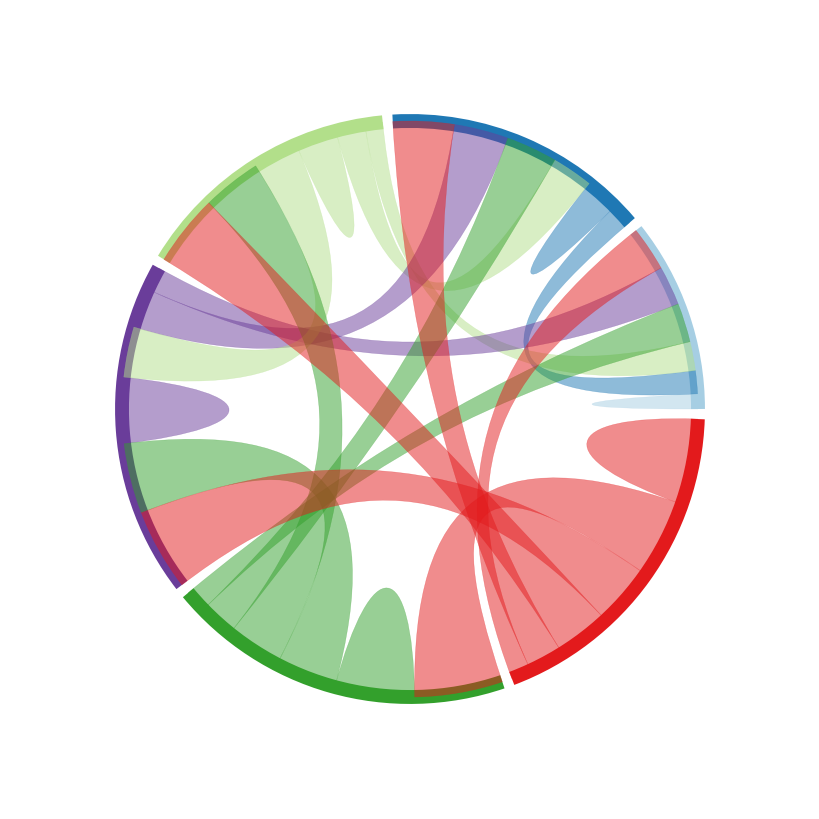

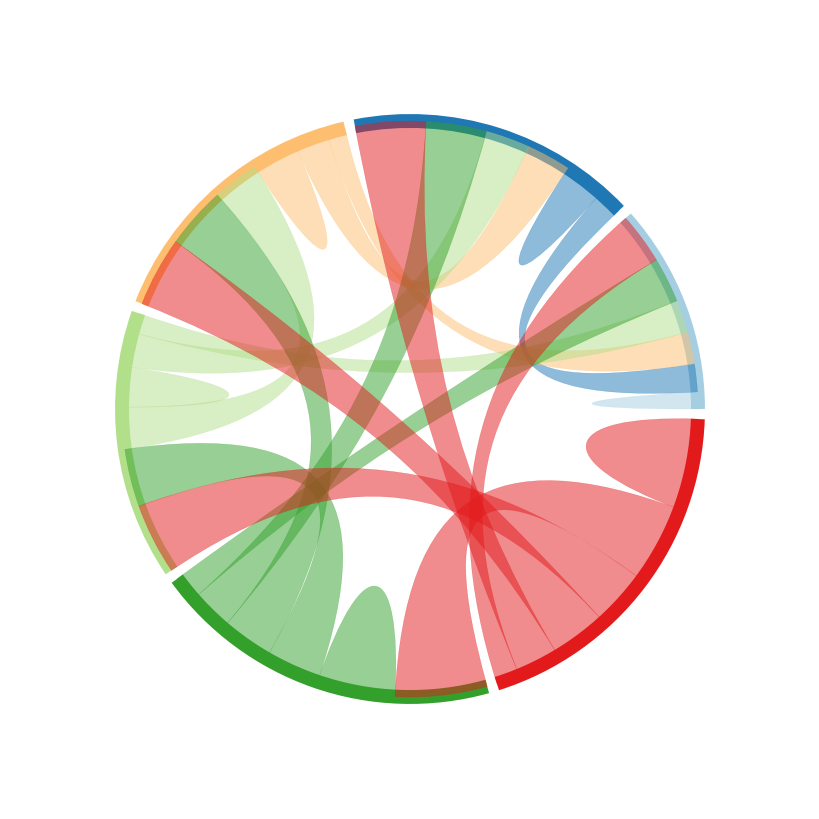

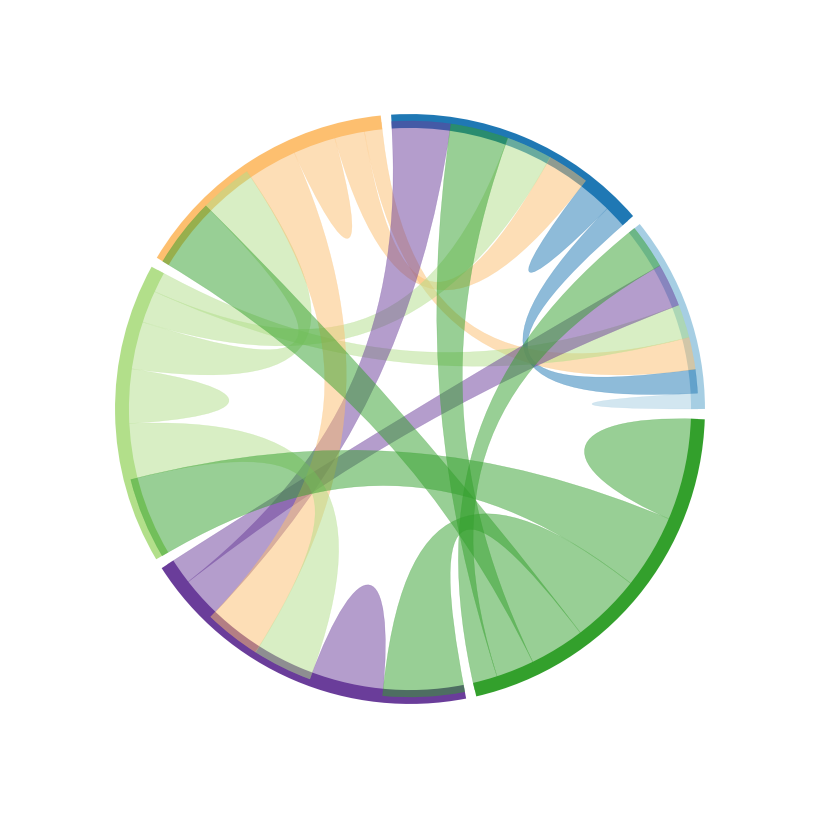

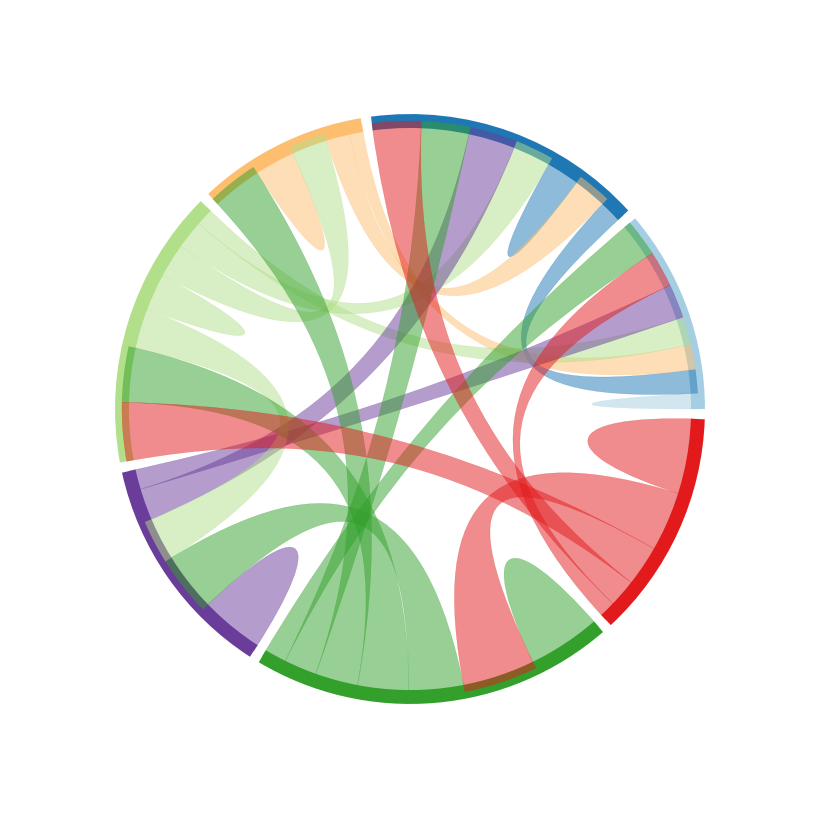

In [20]:
for sample in squidpy_overalls:
    mmcci.plt.chord_plot(sample, colors=colors, label_size=0)

squidpy_int = mmcci.it.integrate_samples(benchmarking_data['squidpy_cci'], method=">=50%")
p_vals = mmcci.it.integrate_p_vals(benchmarking_data['squidpy_pvals'])
squidpy_int = mmcci.it.remove_insignificant(squidpy_int, p_vals)
squidpy_overall = mmcci.it.calculate_overall_interactions(squidpy_int)

mmcci.plt.chord_plot(squidpy_overall, colors=colors, label_size=0)

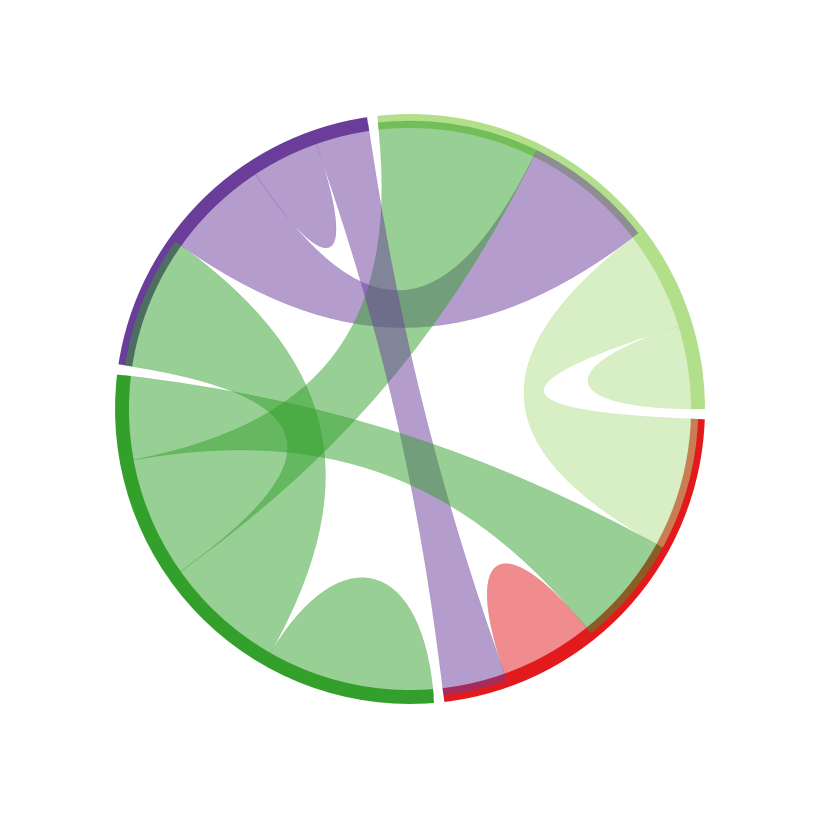

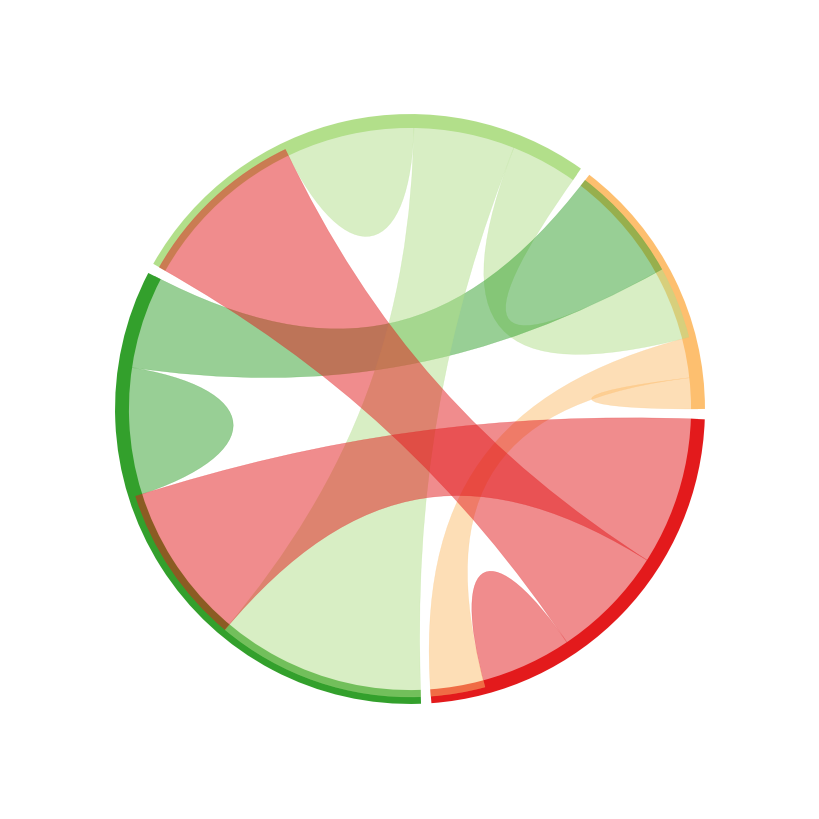

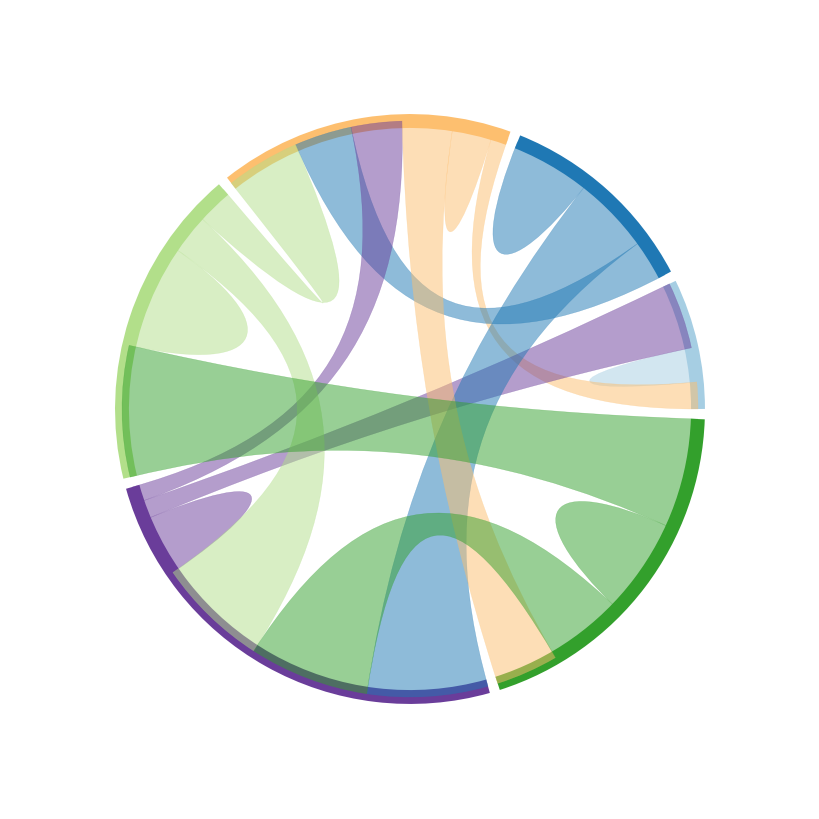

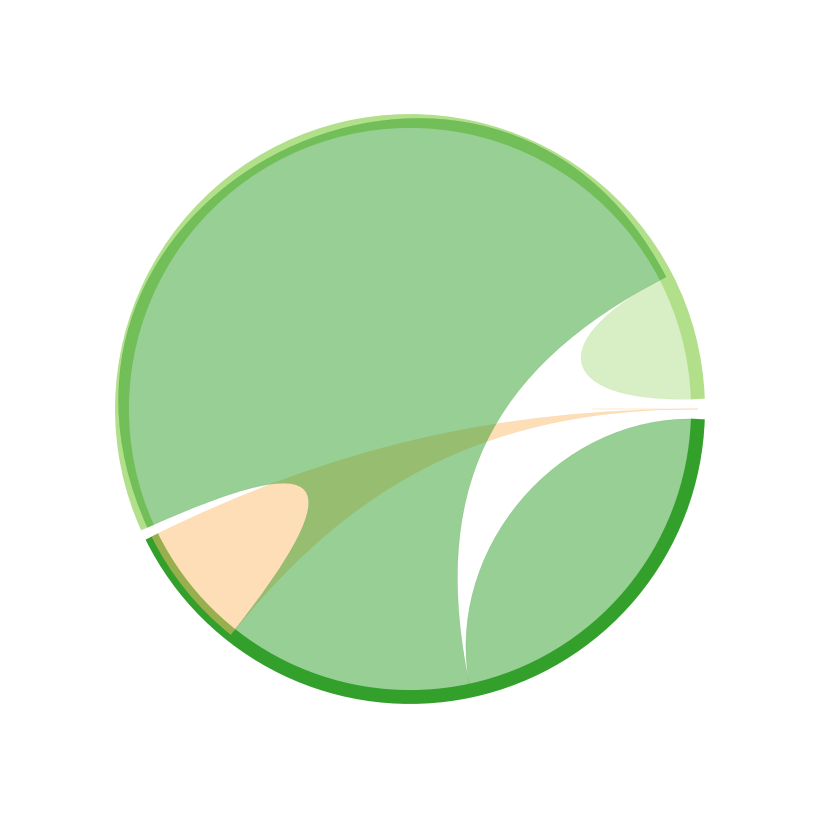

In [14]:
for sample in cellchat_overalls:
    mmcci.plt.chord_plot(sample, colors=colors, label_size=0)

cellchat_int = mmcci.it.integrate_samples(benchmarking_data['cellchat_cci'], method="any")
p_vals = mmcci.it.integrate_p_vals(benchmarking_data['cellchat_pvals'], method="stouffer")
cellchat_int = mmcci.it.remove_insignificant(cellchat_int, p_vals, cutoff=0.05)
cellchat_overall = mmcci.it.calculate_overall_interactions(cellchat_int)
mmcci.plt.chord_plot(cellchat_overall, colors=colors, label_size=0)

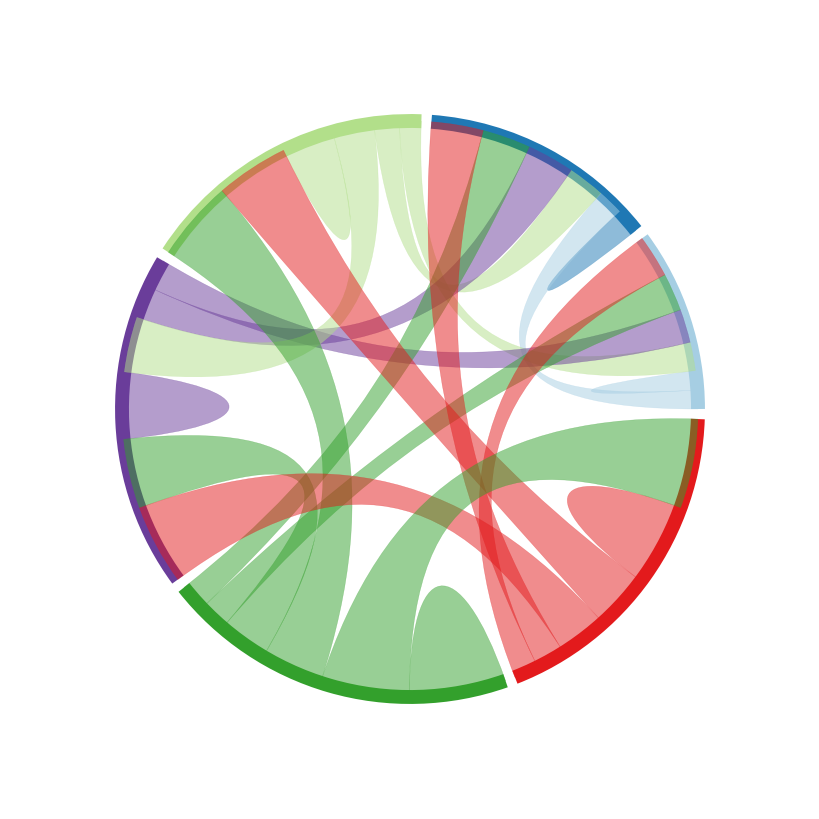

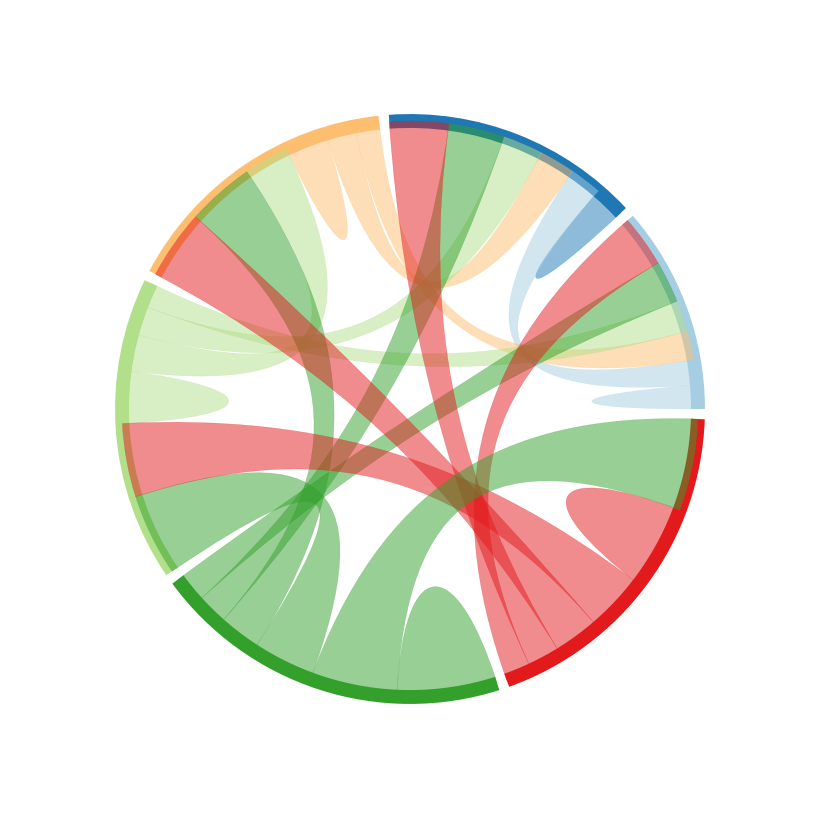

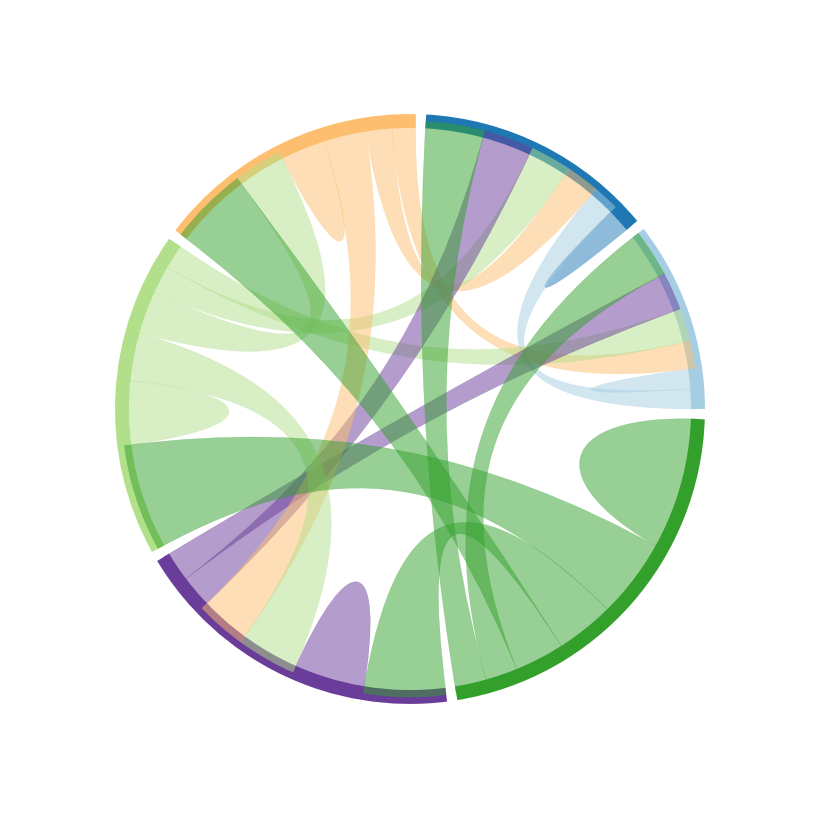

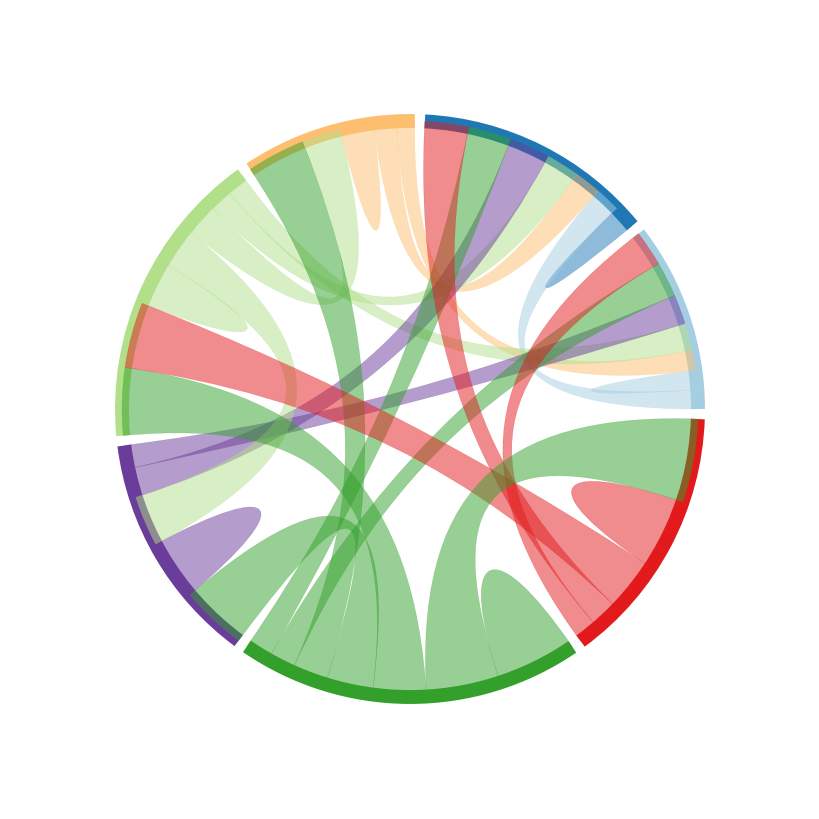

In [24]:
for sample in natmi_overalls:
    mmcci.plt.chord_plot(sample, colors=colors, label_size=0)

natmi_int = mmcci.it.integrate_samples(benchmarking_data['natmi_cci'], method=">=50%")
natmi_overall = mmcci.it.calculate_overall_interactions(natmi_int)
mmcci.plt.chord_plot(natmi_overall, colors=colors, label_size=0)